In [1]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

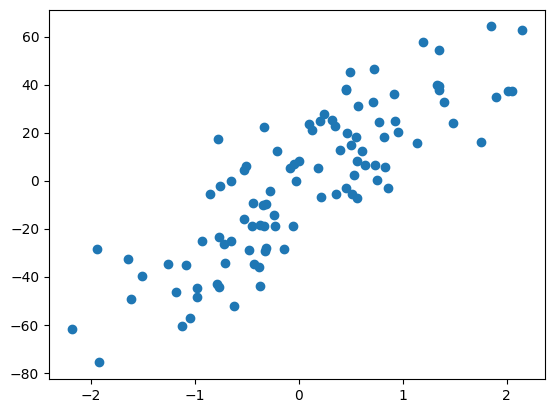

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)


[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [37]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


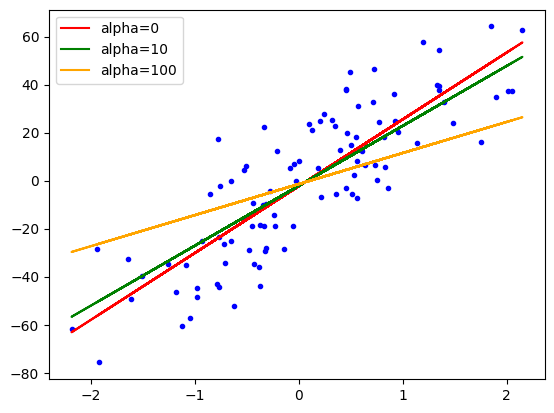

In [38]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

# Diabetes dataset

In [9]:
X,y = load_diabetes(return_X_y=True)

In [10]:
# Convert the features (X) into a pandas DataFrame
X_df = pd.DataFrame(X, columns=["Age", "Sex", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"])

# Convert the target (y) into a pandas Series
y_df = pd.Series(y, name="Disease Progression")

In [11]:
X_df.head()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [12]:
y_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Disease Progression, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [16]:
from sklearn.linear_model import Ridge

In [17]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [18]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [19]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [20]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [21]:
class MyRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [22]:
reg = MyRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281


# Task: Tune 'solver' and value of alpha 

The choice of solver in Ridge regression is influenced by the size of your dataset, the number of features, and whether the data is sparse or dense. Each solver has its own advantages and is optimized for specific types of data and problems. Here's a brief overview of the solvers available for Ridge regression in scikit-learn and when they might be appropriate:

'auto': Scikit-learn will choose the solver automatically based on the type of data provided. This is a good default option if you're unsure which solver to use.

'cholesky': Uses the standard scipy.linalg.solve function to obtain a closed-form solution via the Cholesky decomposition. Best for small to medium datasets where the feature matrix is dense.

'svd': Uses Singular Value Decomposition (SVD) of X to compute the Ridge coefficients. More numerically stable than the 'cholesky' method and can be used in situations where X is not square or when you suspect multicollinearity. It is also efficient for dense data but can be slower than 'cholesky' due to the computation of the SVD.

'lsqr': Solves the Ridge regression using the dedicated iterative least squares solver scipy.sparse.linalg.lsqr. It's very efficient for large datasets and is suitable for both dense and sparse data. It's a good choice when you have a large number of features.

'sparse_cg': Uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. It is recommended for large-scale sparse data, offering a balance between speed and accuracy.

'sag': Stands for Stochastic Average Gradient descent. It is a type of gradient descent that uses a random sample of data at each iteration. It's faster for large datasets, especially with a large number of samples, as it does not compute the full gradient at each iteration. Suitable for large-scale, dense data problems.

'saga': A variant of 'sag' that also supports the non-smooth penalty='l1' option (L1 regularization). This is the method of choice for large datasets when you want a fast convergence and when dealing with features of different scales.

Choosing the Right Solver:

For small to medium dense datasets, 'cholesky' or 'svd' are usually good choices.
For large-scale problems or when dealing with sparse data, 'sag', 'saga', or 'sparse_cg' can be more efficient.
If you need a numerically stable solution regardless of the data size, 'svd' might be the best option.
For very large datasets, 'sag' or 'saga' are recommended due to their efficiency with large-scale data.

# R^2 Score

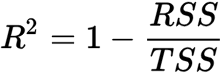

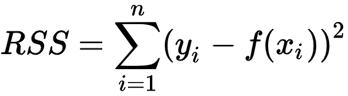

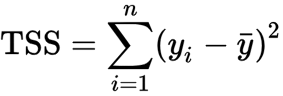


# Interpretation of R² Value:
## Values close to 1: 
Indicate a model that explains a large portion of the variance in the dependent variable based on the independent variables.
## Values close to 0:
Indicate that the model does not explain much of the variance in the dependent variable; it might as well be guessing the mean of the observed responses, regardless of the input features.
## Negative values: 
Can occur when the chosen model fits the data worse than a simple horizontal line representing the mean of the dependent variable. This indicates a poor model fit.

In practice, the r2_score function is used to evaluate the performance of a regression model, with higher values indicating a better fit to the observed data. However, it's important to note that a high R² does not always mean a model is good. In cases of overfitting, the model might have a high R² on the training data but perform poorly on unseen data. Therefore, R² should be considered alongside other metrics and validation techniques.